IMPORTING NECESSARY LIBRARIES

In [ ]:
import pandas as pd

In [ ]:
df_m = pd.read_csv('crime_clean_data.csv')

Data Exploration!

In [ ]:
# Displaying the first 5 rows of the data
df_m.head()

,AREA,AREA NAME,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Premis Cd,Premis Desc,Status,Status Desc,LOCATION,LAT,LON,Date
0,1,Central,1,330,BURGLARY FROM VEHICLE,47,128,BUS STOP/LAYOVER (ALSO QUERY 124),IC,Invest Cont,1000 S FLOWER ST,34.0444,-118.2628,02/08/2020 12:00:00 AM
1,3,Southwest,1,480,BIKE - STOLEN,19,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,1400 W 37TH ST,34.0210,-118.3002,11/04/2020 12:00:00 AM
2,9,Van Nuys,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,405,CLOTHING STORE,IC,Invest Cont,14000 RIVERSIDE DR,34.1576,-118.4387,03/10/2020 12:00:00 AM
3,6,Hollywood,2,354,THEFT OF IDENTITY,28,102,SIDEWALK,IC,Invest Cont,1900 TRANSIENT,34.0944,-118.3277,08/17/2020 12:00:00 AM
4,18,Southeast,2,354,THEFT OF IDENTITY,41,501,SINGLE FAMILY DWELLING,IC,Invest Cont,9900 COMPTON AV,33.9467,-118.2463,12/01/2020 12:00:00 AM


In [ ]:
# Checking for the Missing values in the data frame
df_m.isnull().sum()

AREA           0
AREA NAME      0
Part 1-2       0
Crm Cd         0
Crm Cd Desc    0
Vict Age       0
Premis Cd      0
Premis Desc    0
Status         0
Status Desc    0
LOCATION       0
LAT            0
LON            0
Date           0
dtype: int64

In [ ]:
# Checking the Data types and non-null counts
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637416 entries, 0 to 637415
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   AREA         637416 non-null  int64  
 1   AREA NAME    637416 non-null  object 
 2   Part 1-2     637416 non-null  int64  
 3   Crm Cd       637416 non-null  int64  
 4   Crm Cd Desc  637416 non-null  object 
 5   Vict Age     637416 non-null  int64  
 6   Premis Cd    637416 non-null  int64  
 7   Premis Desc  637416 non-null  object 
 8   Status       637416 non-null  object 
 9   Status Desc  637416 non-null  object 
 10  LOCATION     637416 non-null  object 
 11  LAT          637416 non-null  float64
 12  LON          637416 non-null  float64
 13  Date         637416 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 68.1+ MB


Summarizing The Statistics!!

In [ ]:
# Getting Summary Statistics for Numerical Columns
df_m.describe()

,AREA,Part 1-2,Crm Cd,Vict Age,Premis Cd,LAT,LON
count,637416.000000,637416.000000,637416.000000,637416.000000,637416.000000,637416.000000,637416.000000
mean,10.645470,1.476731,496.472305,40.208782,331.978981,33.987633,-118.051592
std,6.172346,0.499459,220.178737,14.156772,216.048206,1.730177,5.998481
min,1.000000,1.000000,110.000000,19.000000,101.000000,0.000000,-118.667600
25%,5.000000,1.000000,330.000000,29.000000,104.000000,34.016100,-118.432300
50%,11.000000,1.000000,440.000000,37.000000,403.000000,34.059000,-118.324600
75%,16.000000,2.000000,626.000000,50.000000,502.000000,34.164900,-118.274900
max,21.000000,2.000000,956.000000,79.000000,971.000000,34.334300,0.000000


In [ ]:
# Checking value counts for Categorical columns
df_m['AREA NAME'].value_counts()

AREA NAME
Central        46853
Southwest      40051
77th Street    39485
Pacific        36354
Hollywood      34945
Olympic        31642
Southeast      31640
Wilshire       31398
N Hollywood    31119
Topanga        29542
Newton         29382
Rampart        29250
West LA        29051
Van Nuys       28936
West Valley    26361
Northeast      25800
Mission        25376
Devonshire     24497
Harbor         23683
Hollenbeck     21142
Foothill       20909
Name: count, dtype: int64

Data Cleaning!

In [ ]:
df_m.drop('Cross Street', axis=1, inplace=True)
# If it gives the error That the (axis not found ignore it)

KeyError: "['Cross Street'] not found in axis"

In [ ]:
# Filling missing Rows With a Specified value, (hear i use the median value)
df_m['Premis Cd'].fillna(value=203, inplace=True)

In [ ]:
df_m['Premis Desc'].dropna(inplace=True)

In [ ]:
df_m.isnull().sum()

AREA           0
AREA NAME      0
Part 1-2       1
Crm Cd         1
Crm Cd Desc    1
Vict Age       1
Premis Cd      0
Premis Desc    1
Status         1
Status Desc    1
LOCATION       1
LAT            1
LON            1
Date           1
dtype: int64

In [ ]:
"""Identify and Replace Non-Null Placeholder Values:
First, identify if there are any non-null placeholder values in the 'Premis Desc'
column that are not recognized as missing values. These might include empty strings,
"N/A" strings, or other placeholders."""

placeholder_values = ['N/A', 'NA', 'Not Available', 'Unknown', '']
df_m['Premis Desc'] = df_m['Premis Desc'].replace(placeholder_values, pd.NA)

# Then  i will do the approach again!!
df_m.dropna(subset=['Premis Desc'], inplace=True)

In [ ]:
df_m.dropna(subset=['LOCATION'], inplace=True)
df_m.dropna(subset=['LAT'], inplace=True)
df_m.dropna(subset=['LON'], inplace=True)

In [ ]:
df_m.isnull().sum()
# ANd IT's working!!

AREA           0
AREA NAME      0
Part 1-2       0
Crm Cd         0
Crm Cd Desc    0
Vict Age       0
Premis Cd      0
Premis Desc    0
Status         0
Status Desc    0
LOCATION       0
LAT            0
LON            0
Date           0
dtype: int64

In [ ]:
# Converting the datatype of a column from float to int
df_m['Premis Cd'] = df_m['Premis Cd'].astype(int)

In [ ]:
df_m.head()

,AREA,AREA NAME,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Premis Cd,Premis Desc,Status,Status Desc,LOCATION,LAT,LON,Date
0,1,Central,1,330,BURGLARY FROM VEHICLE,47,128,BUS STOP/LAYOVER (ALSO QUERY 124),IC,Invest Cont,1000 S FLOWER ST,34.0444,-118.2628,02/08/2020 12:00:00 AM
1,3,Southwest,1,480,BIKE - STOLEN,19,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,1400 W 37TH ST,34.0210,-118.3002,11/04/2020 12:00:00 AM
2,9,Van Nuys,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,405,CLOTHING STORE,IC,Invest Cont,14000 RIVERSIDE DR,34.1576,-118.4387,03/10/2020 12:00:00 AM
3,6,Hollywood,2,354,THEFT OF IDENTITY,28,102,SIDEWALK,IC,Invest Cont,1900 TRANSIENT,34.0944,-118.3277,08/17/2020 12:00:00 AM
4,18,Southeast,2,354,THEFT OF IDENTITY,41,501,SINGLE FAMILY DWELLING,IC,Invest Cont,9900 COMPTON AV,33.9467,-118.2463,12/01/2020 12:00:00 AM


In [ ]:
# Converting Date Column into Datetime formate
df_m['Date'] = pd.to_datetime(df_m['Date'])

In [ ]:
# As we see we have a lot of zeros within the column so we will remove it,
df_m.drop(df_m[df_m['Vict Age'] == 0].index, inplace=True)

In [ ]:
(df_m['Vict Age'] == 0).sum()

0

In [ ]:
import numpy as np

In [ ]:
# I will set an (80 age MAX) and (18 for min)
df_m.drop(df_m[df_m['Vict Age'] >= 80].index, inplace=True)
df_m.drop(df_m[df_m['Vict Age'] <= 18].index, inplace=True)


In [ ]:
df_m['Vict Age'].max()

79

In [ ]:
df_m['Vict Age'].min()

19

In [ ]:
df_m['Crm Cd Desc']

0                                    BURGLARY FROM VEHICLE
1                                            BIKE - STOLEN
2                 SHOPLIFTING-GRAND THEFT ($950.01 & OVER)
3                                        THEFT OF IDENTITY
4                                        THEFT OF IDENTITY
                               ...                        
67729                   THEFT PLAIN - PETTY ($950 & UNDER)
67730                                             BURGLARY
67731    THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...
67732                    INTIMATE PARTNER - SIMPLE ASSAULT
67733             VANDALISM - MISDEAMEANOR ($399 OR UNDER)
Name: Crm Cd Desc, Length: 67734, dtype: object

Visualization Part!!!

In [ ]:
# wE WILL visualize the data Using Seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'BATTERY - SIMPLE ASSAULT'),
  Text(1, 0, 'BURGLARY FROM VEHICLE'),
  Text(2, 0, 'INTIMATE PARTNER - SIMPLE ASSAULT'),
  Text(3, 0, 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT'),
  Text(4, 0, 'THEFT OF IDENTITY'),
  Text(5, 0, 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)'),
  Text(6, 0, 'THEFT PLAIN - PETTY ($950 & UNDER)'),
  Text(7, 0, 'BURGLARY'),
  Text(8, 0, 'ROBBERY'),
  Text(9, 0, 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)')])

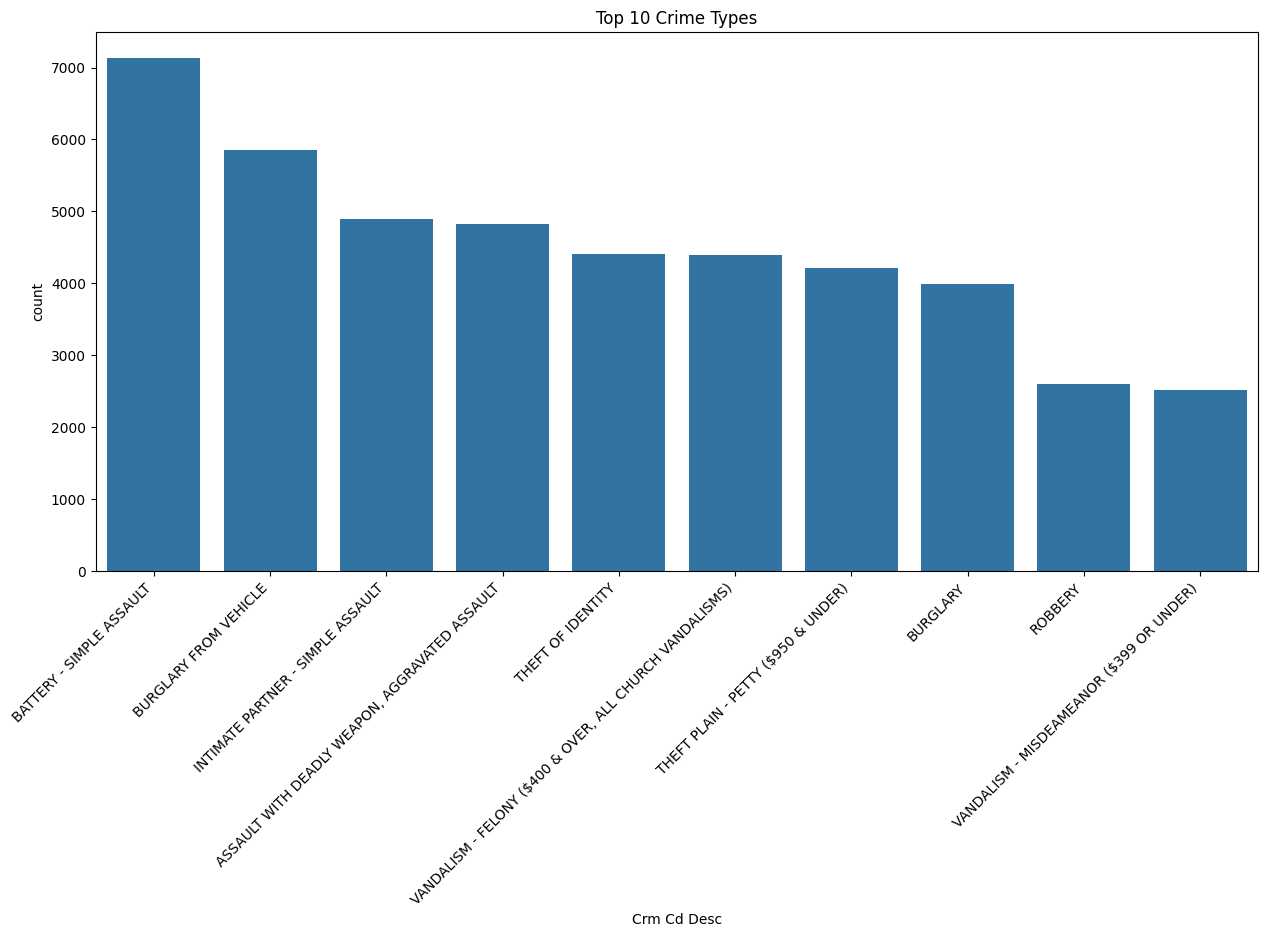

In [ ]:
# Firstly Visualizing the Top crime Types!
plt.figure(figsize=(15, 7))
sns.countplot(x='Crm Cd Desc', data=df_m, order=df_m['Crm Cd Desc'].value_counts().index[:10])
plt.title('Top 10 Crime Types')
plt.xticks(rotation=45, ha='right')

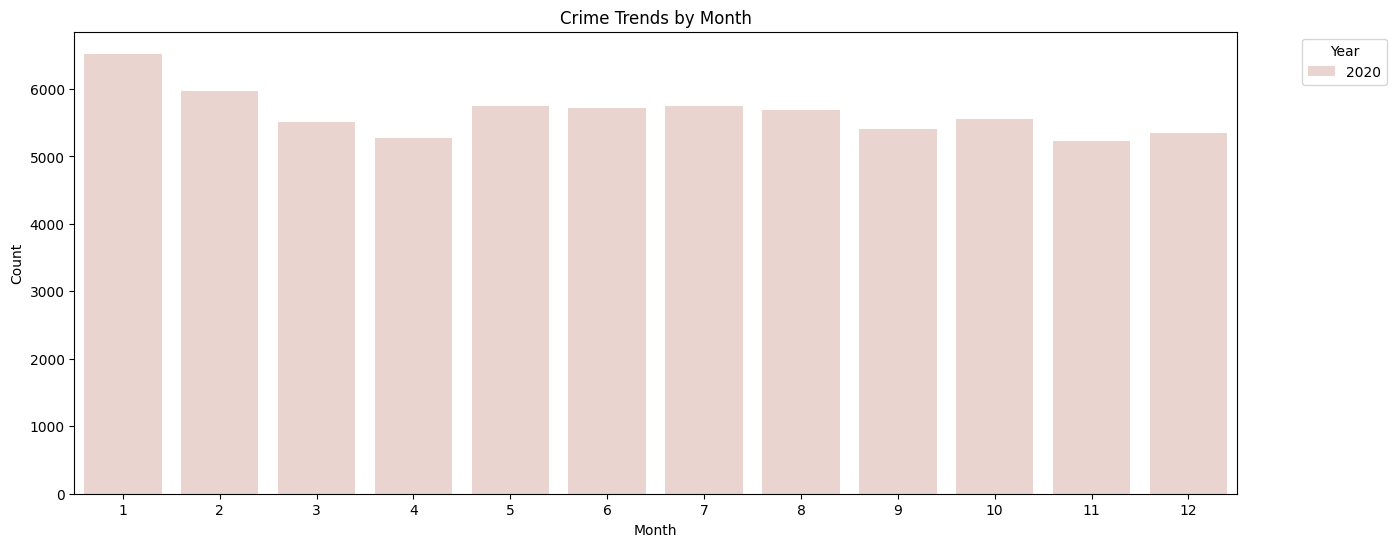

In [ ]:
# Extracting month and year from the date column
df_m['month'] = df_m['Date'].dt.month
df_m['year'] = df_m['Date'].dt.year

# Plotting the crime trends over time---->>>
plt.figure(figsize=(15, 6))
sns.countplot(x='month', hue='year', data=df_m)
plt.title('Crime Trends by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='year', bbox_to_anchor=(1.05, 1), loc='upper left')

In [ ]:
# Identifying Crime Hotspot by location


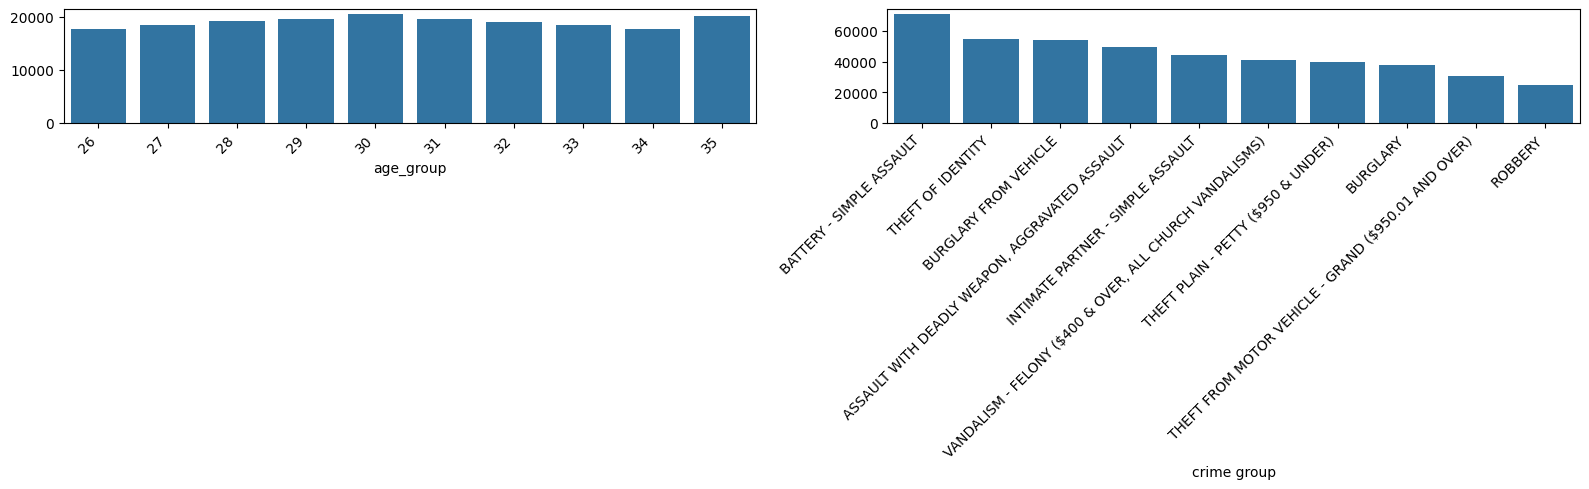

In [ ]:
# It Not Show us the accurate result so we will se the top age and crime
top_age_group = df_m['Vict Age'].value_counts().head(10)
top_crime_group = df_m['Crm Cd Desc'].value_counts().head(10)

# Creating a barplot to visualize the compared result of top 10 age and crime data using SEABORN and MATPLOTLIB

plt.figure(figsize=(16, 5))

# We will compare with using sublots for top 5 age group
plt.subplot(1, 2, 1)
sns.barplot(x=top_age_group.index, y=top_age_group.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('age_group')


plt.subplot(1, 2, 2)
sns.barplot(x=top_crime_group.index, y=top_crime_group.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('crime group')
plt.tight_layout()


In [ ]:
df_m.head()

,AREA,AREA NAME,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Premis Cd,Premis Desc,Status,Status Desc,LOCATION,LAT,LON,Date
1,1,Central,1,330,BURGLARY FROM VEHICLE,47,128,BUS STOP/LAYOVER (ALSO QUERY 124),IC,Invest Cont,1000 S FLOWER ST,34.0444,-118.2628,02/08/2020 12:00:00 AM
2,3,Southwest,1,480,BIKE - STOLEN,19,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,1400 W 37TH ST,34.0210,-118.3002,11/04/2020 12:00:00 AM
3,9,Van Nuys,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,405,CLOTHING STORE,IC,Invest Cont,14000 RIVERSIDE DR,34.1576,-118.4387,03/10/2020 12:00:00 AM
4,6,Hollywood,2,354,THEFT OF IDENTITY,28,102,SIDEWALK,IC,Invest Cont,1900 TRANSIENT,34.0944,-118.3277,08/17/2020 12:00:00 AM
5,18,Southeast,2,354,THEFT OF IDENTITY,41,501,SINGLE FAMILY DWELLING,IC,Invest Cont,9900 COMPTON AV,33.9467,-118.2463,12/01/2020 12:00:00 AM


In [ ]:
# Let's Group by the date and crimes to count it
crime_by_date = df_m.groupby('Date')['Crm Cd'].count()
crime_by_date

Date
01/01/2020 12:00:00 AM    428
01/02/2020 12:00:00 AM    191
01/03/2020 12:00:00 AM    208
01/04/2020 12:00:00 AM    174
01/05/2020 12:00:00 AM    167
                         ... 
12/27/2020 12:00:00 AM    136
12/28/2020 12:00:00 AM    148
12/29/2020 12:00:00 AM    157
12/30/2020 12:00:00 AM    160
12/31/2020 12:00:00 AM    189
Name: Crm Cd, Length: 366, dtype: int64

In [ ]:
# Let's group by area and crime
crime_by_area = df_m.groupby('AREA NAME')['Crm Cd'].count()
crime_by_area
# 77th Street is were most crimes did::

AREA NAME
77th Street    4489
Central        4089
Devonshire     2506
Foothill       2429
Harbor         2721
Hollenbeck     2258
Hollywood      3580
Mission        2923
N Hollywood    3381
Newton         3073
Northeast      2662
Olympic        3059
Pacific        3713
Rampart        3044
Southeast      3629
Southwest      4272
Topanga        3178
Van Nuys       3194
West LA        3264
West Valley    2696
Wilshire       3575
Name: Crm Cd, dtype: int64

<!-- Lets's Perform Machine Learning Algorithms -->

Machine learning time###

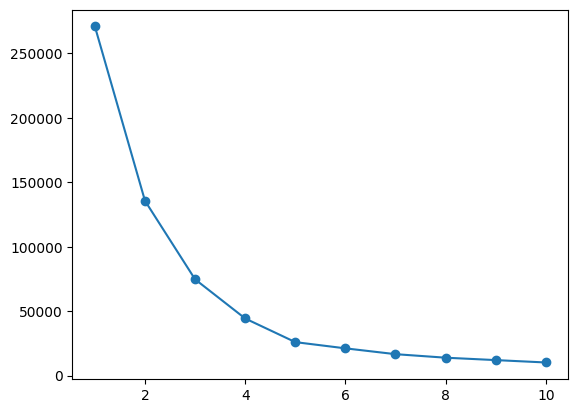

In [ ]:
# Most of the thing and the structure of the data said that it's clustering, hehe, so let's perform!!
# I will do it on sklearn Kmeans Clustering!!
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
# For Clustering which columns are relevant for K-means clustering (represented by the feature matrix X)
#  typically consider numerical columns that represent characteristics or features data that are meaningful for clustering
# since K-means clustering is an unsupervised learning method that groups similar data points together based on their features

X = df_m[['LAT', 'LON', 'Vict Age', 'Premis Cd']]

# Let's Scale the features!
scaler = StandardScaler()
X = scaler.fit_transform(X)
# THen Let's initialize the kmeans
# For choosing the best value for k we will implement the Elbow method!
inertia = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia, marker='o')

In [ ]:
# It's giving us that the best value for K is 4 or 5.
# to 5 for more robust seeing of the data and interpreting the result
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)


# Getting the cluster labels for each DataPoint
clusters = kmeans.labels_

# Adding the clustering label to my dataframe for analysing and visualizing
df_m['Cluster'] = clusters

# Now Let's analyse the cluster and it's characteristics
# Getting THe Centroid of each cluster
cluster_center = kmeans.cluster_centers_
# counting the datapoints in each column
cluster_counts = df_m['Cluster'].value_counts()
print('Cluster centers:')
print(cluster_center)

In [ ]:
# IN FACT YOU DO NOT NEED TO CREATE IT(IT'S USE HIGH COMPUTATION POWER SO LEAVE JUST SEE THE {ATTACH MAP})


# Let's visualize the Clusters on the map we Will USE the (folium)
import folium

# Creating a map centered around the mean latitude and longitude
crime_map_cluster = folium.Map(location=[df_m['LAT'].mean(), df_m['LON'].mean()], zoom_start=10)

# adding marker on the map for crime location, With different color for each CLUSter
colors = ['red', 'blue', 'green']
for index, row in df_m.iterrows():
    folium.Marker([row['LAT'], row['LON']], popup=f"Cluster: {row['Cluster']}",
                   icon=folium.Icon(color=colors[row['Cluster']])).add_to(crime_map_cluster)
# Let's Display the map
crime_map_cluster.save('crime_map_clusters.html')
# It WILL Take a few minutes;---

CLUSTER INTERPRETATION

In [ ]:
# Let's interpret the clusters based on it's features
cluster_0 = df_m[df_m['Cluster'] == 0]
cluster_1 = df_m[df_m['Cluster'] == 1]
cluster_2 = df_m[df_m['Cluster'] == 2]

# analayzing it
print('Cluster 0:')
print(cluster_0.describe())

In [ ]:
print('Cluster 1:')
print(cluster_1.describe())

In [ ]:
print('Cluster 2:')
print(cluster_2.describe())

Phase of Predictive Modeling

In [ ]:
# IMporting the necessary libraries!
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# SPliting The Data into Training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, clusters, test_size=.2, random_state=42)

# training the model
lgs_r = LogisticRegression()
lgs_r.fit(X_train, y_train)

# Predicting the model on unseen data(test Set)
y_pred = lgs_r.predict(X_test)

# Evaluating The model!
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy: ", accuracy)

Model Accuracy:  1.0


Addressing overfitting!!

In [ ]:
# Let's address the overfitting


from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Initializing another Logistic model with l2 regularization (Ridge)
logistic_model = LogisticRegression(penalty='l2', solver='liblinear')

# Here i performing feature selection based on l2 regularization::
sfm = SelectFromModel(logistic_model)
X_train_selected = sfm.fit_transform(X_train, y_train)
X_test_selected = sfm.transform(X_test)


# Training the model on the selected feature
logistic_model.fit(X_train_selected, y_train)

# Then Making prediction on the test set
y_predict = logistic_model.predict(X_test_selected)

# Evaluating the model Performance
accuracy = accuracy_score(y_test, y_predict)
print('Accuracy Score: ', accuracy)

# Perform cross-Validation to assess model Generalization!
kfold = KFold(n_splits=5)
cv_score = cross_val_score(logistic_model, X_train_selected, y_train, cv=kfold)
print("Cross Validation Score: ", cv_score)
print("Mean Cross validation score: ", cv_score.mean())

# Calculating ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_predict)

# Classification report
print("classification Report: \n",classification_report(y_test, y_predict))

Accuracy Score:  0.979921753893851
Cross Validation Score:  [0.98357631 0.98366857 0.9823752  0.98219064 0.98163698]
Mean Cross validation score:  0.9826895405577349
classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.94      0.96      2658
           1       1.00      0.99      0.99      4273
           2       0.00      0.00      0.00        58
           3       1.00      0.99      0.99      2603
           4       0.95      1.00      0.97      3955

    accuracy                           0.98     13547
   macro avg       0.79      0.78      0.78     13547
weighted avg       0.98      0.98      0.98     13547



**EXTRA'S**

Let's View the Feature Importance!

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Trianing a random forest classifier To Access the feature importance
rfc_cl = RandomForestClassifier()
rfc_cl.fit(X_train, y_train)

# Getting feature Importance!
feature_importance = rfc_cl.feature_importances_

In [ ]:
print("Feature IMportance: ")
print(feature_importance)

Feature IMportance: 
[0.0047294  0.00532774 0.50610864 0.48383422]


In [ ]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196780 entries, 0 to 196779
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   AREA         196780 non-null  int64         
 1   AREA NAME    196780 non-null  object        
 2   Part 1-2     196780 non-null  float64       
 3   Crm Cd       196780 non-null  float64       
 4   Crm Cd Desc  196780 non-null  object        
 5   Vict Age     196780 non-null  float64       
 6   Premis Cd    196780 non-null  int64         
 7   Premis Desc  196780 non-null  object        
 8   Status       196780 non-null  object        
 9   Status Desc  196780 non-null  object        
 10  LOCATION     196780 non-null  object        
 11  LAT          196780 non-null  float64       
 12  LON          196780 non-null  float64       
 13  Date         196780 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(2), object(6)
memory usage: 22.5+ MB


# Tensorflow Part With Text Analysis

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, concatenate
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
X_text = df_m[['Crm Cd Desc', 'Premis Desc', 'Status Desc', 'LOCATION']]
X_numeric = df_m.drop(['Crm Cd Desc', 'Premis Desc', 'Status Desc', 'LOCATION', 'Date'], axis=1)
y = df_m['Date']

# I wil Preprocess Text Data
vocab_size = 10000
max_len = 100
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_text.values.flatten())
X_test_encode = tokenizer.texts_to_sequences(X_text.values.flatten())
X_test_padded = tf.keras.preprocessing.sequence.pad_sequences(X_test_encode, maxlen=max_len)

# Standardized Numerical data
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

ValueError: could not convert string to float: 'Central'

In [ ]:
# Spliting THe data into Training and Testing set
X_train_text, X_text